In [1]:
import pandas as pd
import numpy as np
import requests
import html5lib
import matplotlib
import matplotlib.pyplot as plt


In [2]:
def adquire_new_df():
    dfs = pd.read_html('https://en.wikipedia.org/wiki/The_World%27s_Billionaires')
    data_new = dfs[11]
    data_new.to_csv('../data/processed/prueba_jupyter.csv')
    return data_new
df = adquire_new_df()
data_new = df

In [3]:
def adquire_init_df():
    data = pd.read_csv("../data/processed/data.csv", index_col=0)
    return data
data = adquire_init_df()
data


,id,lastName,age,worth_2019_in_BUSD,position
0,2813,bezos,54.0,112.0,1.0
1,8910,gates,62.0,90.0,2.0
2,3919,buffett,87.0,84.0,3.0
3,6449,arnault,69.0,72.0,4.0
4,5032,zuckerberg,1985.0,71.0,5.0
...,...,...,...,...,...
2203,2065,zhao,51.0,1.0,2204.0
2204,2207,zhou,55.0,1.0,2205.0
2205,3442,zhu,51.0,1.0,2206.0
2206,8144,zhuo,52.0,1.0,2207.0


In [4]:
"""year = input('Indica un año entre 2017 y 2010:')
year"""

"year = input('Indica un año entre 2017 y 2010:')\nyear"

In [5]:
"""def select_year(str):
    data_year = str
    error = 'ValueError'
    if data_year == '2010':
        data_new = dfs[11]
        return data_new
    elif data_year == '2011':
        data_new = dfs[10]
        return data_new
    elif data_year == '2012':
        data_new = dfs[9]
        return data_new
    elif data_year == '2013':
        data_new = dfs[8]
        return data_new
    elif data_year == '2014':
        data_new = dfs[7]
        return data_new
    elif data_year == '2015':
        data_new = dfs[6]
        return data_new
    elif data_year == '2016':
        data_new = dfs[5]
        return data_new
    elif data_year == '2017':
        data_new = dfs[4]
        return data_new
    else:
        raise ValueError('Value not admited')
 

data_new = select_year(year)
"""

"def select_year(str):\n    data_year = str\n    error = 'ValueError'\n    if data_year == '2010':\n        data_new = dfs[11]\n        return data_new\n    elif data_year == '2011':\n        data_new = dfs[10]\n        return data_new\n    elif data_year == '2012':\n        data_new = dfs[9]\n        return data_new\n    elif data_year == '2013':\n        data_new = dfs[8]\n        return data_new\n    elif data_year == '2014':\n        data_new = dfs[7]\n        return data_new\n    elif data_year == '2015':\n        data_new = dfs[6]\n        return data_new\n    elif data_year == '2016':\n        data_new = dfs[5]\n        return data_new\n    elif data_year == '2017':\n        data_new = dfs[4]\n        return data_new\n    else:\n        raise ValueError('Value not admited')\n \n\ndata_new = select_year(year)\n"

In [6]:
data_new.columns

Index(['No.', 'Name', 'Net worth (USD)', 'Age', 'Nationality',
       'Source(s) of wealth'],
      dtype='object')

In [7]:

def delete_columns(df):
    
    # define valid columns
    valid_columns = ['Name', 'Net worth (USD)']
    # create new df with valid columns
    data_new = df[[x for x in df.columns if x in valid_columns]]
    data_new.rename(columns={'Net worth (USD)': 'Net_worth_(USD)'}, inplace = True)
    return data_new

data_new = delete_columns(data_new)
data_new


/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Name,Net_worth_(USD)
0,Carlos Slim & family,$53.5 billion
1,Bill Gates,$53.0 billion
2,Warren Buffett,$47.0 billion
3,Mukesh Ambani,$29.0 billion
4,Lakshmi Mittal,$28.7 billion
5,Larry Ellison,$28.0 billion
6,Bernard Arnault,$27.5 billion
7,Eike Batista,$27.0 billion
8,Amancio Ortega,$25.0 billion
9,Karl Albrecht,$23.5 billion


In [8]:
def replace_text(df):
    df.loc[:,'Net_worth_(USD)'] = df['Net_worth_(USD)'].str.replace('billion', '')
    df.loc[:,'Net_worth_(USD)'] = df['Net_worth_(USD)'].str.replace('$', '')
    df.loc[:,'Name'] = df['Name'].str.replace(' & family', '')
    df.loc[:,'Name'] = df['Name'].str.replace(' ', '_')
    df.rename(columns={'Net_worth_(USD)': 'worth 2010 in BUSD'}, inplace = True)
    return data_new
data_new = replace_text(data_new)
data_new

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Name,worth 2010 in BUSD
0,Carlos_Slim,53.5
1,Bill_Gates,53.0
2,Warren_Buffett,47.0
3,Mukesh_Ambani,29.0
4,Lakshmi_Mittal,28.7
5,Larry_Ellison,28.0
6,Bernard_Arnault,27.5
7,Eike_Batista,27.0
8,Amancio_Ortega,25.0
9,Karl_Albrecht,23.5


In [9]:
data_aux = data_new
name_list = data_aux['Name'].tolist()
name_list


['Carlos_Slim',
 'Bill_Gates',
 'Warren_Buffett',
 'Mukesh_Ambani',
 'Lakshmi_Mittal',
 'Larry_Ellison',
 'Bernard_Arnault',
 'Eike_Batista',
 'Amancio_Ortega',
 'Karl_Albrecht']

In [10]:
list_lastName = [i.split('_', 1)[1] for i in name_list] # Delete firstName_
list_lastName

['Slim',
 'Gates',
 'Buffett',
 'Ambani',
 'Mittal',
 'Ellison',
 'Arnault',
 'Batista',
 'Ortega',
 'Albrecht']

In [11]:
data_aux['new_column'] = pd.Series(list_lastName).values
data_aux.drop('Name', axis=1, inplace=True)
data_aux.rename(columns={'new_column': 'lastName'}, inplace = True)

data_aux

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,worth 2010 in BUSD,lastName
0,53.5,Slim
1,53.0,Gates
2,47.0,Buffett
3,29.0,Ambani
4,28.7,Mittal
5,28.0,Ellison
6,27.5,Arnault
7,27.0,Batista
8,25.0,Ortega
9,23.5,Albrecht


In [12]:
"""
def split_column(data_new):
    # new data frame with split value columns
    
    new = data_new['Name'].str.split(' ', n = 1, expand = True) 
 
    # making separate last name column from new data frame
    #data_new['lastName']= new[1]
    
    # Dropping old Name columns
    new.drop(columns =[0], inplace = True)
    #new[1] = new.rename['lastName']
    new.rename(columns={1: 'lastName'}, inplace = True)
    return new
new = split_column(data_new)
new

"""

"\ndef split_column(data_new):\n    # new data frame with split value columns\n    \n    new = data_new['Name'].str.split(' ', n = 1, expand = True) \n \n    # making separate last name column from new data frame\n    #data_new['lastName']= new[1]\n    \n    # Dropping old Name columns\n    new.drop(columns =[0], inplace = True)\n    #new[1] = new.rename['lastName']\n    new.rename(columns={1: 'lastName'}, inplace = True)\n    return new\nnew = split_column(data_new)\nnew\n\n"

In [13]:
"""def join(df1,df2):
    data_new_2 = pd.concat([df1, df2], axis=1, ignore_index=True)
    data_new_2 = df1.join(df2)
    data_new_2.drop(columns =['Name'], inplace = True)
    #df_final = df.drop_duplicates(subset='lastName', keep='first')
    return data_new_2
data_new_2 = join(data_new, data_aux)
data_new_2"""

"def join(df1,df2):\n    data_new_2 = pd.concat([df1, df2], axis=1, ignore_index=True)\n    data_new_2 = df1.join(df2)\n    data_new_2.drop(columns =['Name'], inplace = True)\n    #df_final = df.drop_duplicates(subset='lastName', keep='first')\n    return data_new_2\ndata_new_2 = join(data_new, data_aux)\ndata_new_2"

In [14]:
def lower_text(df):
    df['lastName'] = df['lastName'].apply(lambda x: x.lower())
    return data_aux

data_aux = lower_text(data_aux)
data_aux


/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,worth 2010 in BUSD,lastName
0,53.5,slim
1,53.0,gates
2,47.0,buffett
3,29.0,ambani
4,28.7,mittal
5,28.0,ellison
6,27.5,arnault
7,27.0,batista
8,25.0,ortega
9,23.5,albrecht


In [15]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
worth 2010 in BUSD    10 non-null object
lastName              10 non-null object
dtypes: object(2)
memory usage: 288.0+ bytes


In [16]:
def change_column_type_2(df):
    df['worth 2010 in BUSD'] = df['worth 2010 in BUSD'].astype(float)
    return data_aux
data_aux = change_column_type_2(data_aux)
data_aux.dtypes

/home/emilio/miniconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


worth 2010 in BUSD    float64
lastName               object
dtype: object

In [17]:
def final_table(df1,df2):
    df = pd.merge(df1, df2, on='lastName')
    df_final = df.drop_duplicates(subset='lastName', keep='first')
    return df_final
df_final = final_table(data, data_aux)
df_final

,id,lastName,age,worth_2019_in_BUSD,position,worth 2010 in BUSD
0,8910,gates,62.0,90.0,2.0,53.0
1,3919,buffett,87.0,84.0,3.0,47.0
2,6449,arnault,69.0,72.0,4.0,27.5
3,2009,ortega,82.0,70.0,6.0,25.0
4,6377,ellison,73.0,58.5,10.0,28.0
5,5930,ambani,61.0,40.1,19.0,29.0
7,5336,albrecht,67.0,20.2,48.0,23.5
8,9326,mittal,68.0,18.5,62.0,28.7


In [18]:
# Save first clean table to CSV file
def save_table(df):
    
    df_final.to_csv('../data/processed/df_final.csv')
    

# Call function
save_table(df_final)

In [19]:
def wealth_difference(df):
    df_final['difference_19_10']= df_final['worth_2019_in_BUSD']- df_final['worth 2010 in BUSD']
    return df_final
df_final = wealth_difference(df_final)
df_final

,id,lastName,age,worth_2019_in_BUSD,position,worth 2010 in BUSD,difference_19_10
0,8910,gates,62.0,90.0,2.0,53.0,37.0
1,3919,buffett,87.0,84.0,3.0,47.0,37.0
2,6449,arnault,69.0,72.0,4.0,27.5,44.5
3,2009,ortega,82.0,70.0,6.0,25.0,45.0
4,6377,ellison,73.0,58.5,10.0,28.0,30.5
5,5930,ambani,61.0,40.1,19.0,29.0,11.1
7,5336,albrecht,67.0,20.2,48.0,23.5,-3.3
8,9326,mittal,68.0,18.5,62.0,28.7,-10.2


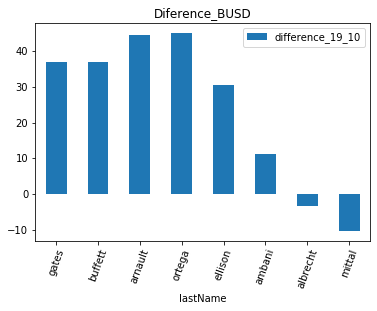

In [20]:
title = 'Diference_BUSD'

def visualize(df, title):
   
    barchart = df.plot.bar(x="lastName", y="difference_19_10", 
                rot=70, title=title)
    return barchart

barchart = visualize(df_final, title)
        




In [21]:
def save_barchart(barchart):
    fig = barchart.get_figure()
    fig.savefig('../data/results/'+ title + '.pdf')
    return

save_barchart(barchart)